In [25]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Задача 1 

Мы рассмотрели несколько вариантов добавления эффекта. Есть ли смысл думать о способе добавления эффекта при оценке вероятности ошибки II рода или все способы дают одинаковый результат? Результаты могут быть разными. Чтобы в этом убедиться, проведём численный эксперимент.

Допустим, в наш А/В-тест попадают все пользователи, совершавшие покупки до 28 марта.

 
Целевая метрика — средняя выручка с клиента за время эксперимента. Целевую метрику считаем на неделе с 21 по 28 марта. Уровень значимости — 0.05. Критерий — тест Стьюдента. Размер групп — 1000. Ожидаемый эффект — средняя выручка увеличится на 10%.

Нужно оценить вероятности ошибок II рода для трёх вариантов добавления эффекта:

1. Добавление константы ко всем значениям;

2. Умножение на константу всех значений;

3. Добавление константы к 2.5% значений.

В качестве ответа введите номера способов добавления эффекта в порядке увеличения оценки вероятности ошибки II рода. Например, если при добавлении константы ко всем значениям оценка вероятности ошибки минимальна, при добавлении константы к 2.5% значений максимальна, то ответ будет: 123.

In [26]:
sales = pd.read_csv('2022-04-01T12_df_sales.csv')

In [27]:
march_sales = sales.query('date <= "2022-03-28" & date >= "2022-03-21"')

In [28]:
users = df_sales[df_sales['date'] < "2022-03-28"][['user_id']].drop_duplicates()
march_metric = (
    df_sales.query('date <= "2022-03-28" & date >= "2022-03-21"')
    .groupby('user_id')[['price']].sum()
    .reset_index()
)

df = pd.merge(users, march_metric, on='user_id', how='left').fillna(0)

In [29]:
def plot_pvalue_ecdf(pvalues, alpha=0.05, title=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    if title:
        plt.suptitle(title)

    sns.histplot(pvalues, ax=ax1, bins=20, stat='density')
    ax1.plot([0,1],[1,1], 'k--')
    ax1.set(xlabel='p-value', ylabel='Density')

    sns.ecdfplot(pvalues, ax=ax2)
    ax2.plot([0,1],[0,1], 'k--')
    ax2.axvline(alpha, color='black')
    ax2.set(xlabel='p-value', ylabel='Probability')
    ax2.grid()

In [30]:
alpha = 0.05
mean = df.price.mean()
std = df.price.std()
sample_size = 1000
mde = 0.1

part errors = 0.8168


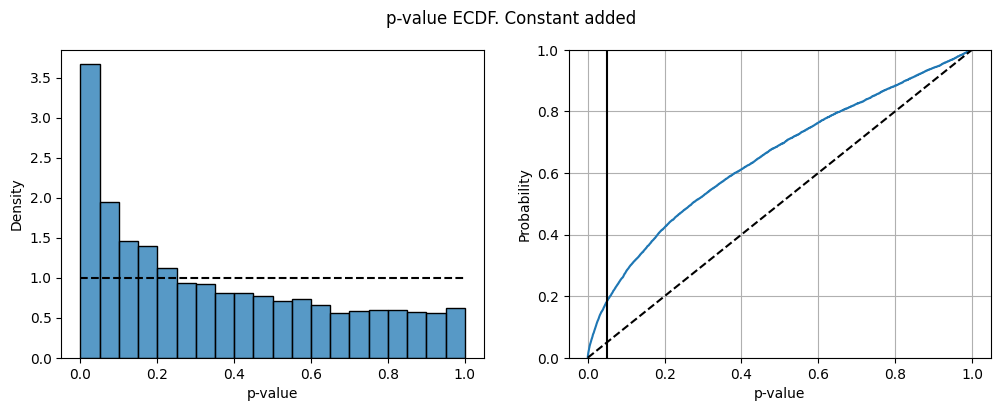

In [31]:
p_values = []
for _ in range(10000):
    sample_users = df.sample(sample_size * 2)
    a = sample_users.user_id[:sample_size]
    b = sample_users.user_id[sample_size:]
    control = df[df['user_id'].isin(a)].price
    test_constant = df[df['user_id'].isin(b)].price + mean * mde
    p_val = stats.ttest_ind(control, test_constant).pvalue
    p_values.append(p_val)

plot_pvalue_ecdf(p_values, alpha=alpha, title='p-value ECDF. Constant added')
errors = (np.array(p_values) > alpha).astype(int)
print(f'part errors = {np.mean(errors):0.4f}')

part errors = 0.8306


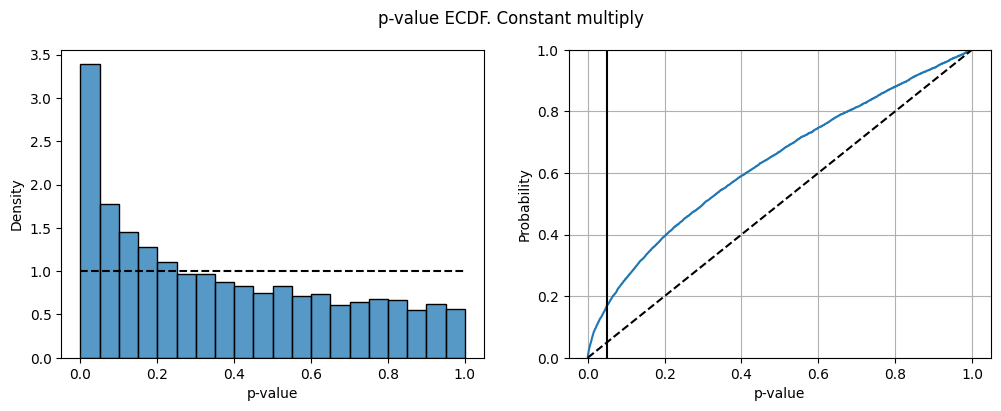

In [32]:
p_values = []
for _ in range(10000):
    sample_users = df.sample(sample_size * 2)
    a = sample_users.user_id[:sample_size]
    b = sample_users.user_id[sample_size:]
    control = df[df['user_id'].isin(a)].price
    test_constant = df[df['user_id'].isin(b)].price * (1 + mde)
    p_val = stats.ttest_ind(control, test_constant).pvalue
    p_values.append(p_val)

plot_pvalue_ecdf(p_values, alpha=alpha, title='p-value ECDF. Constant multiply')
errors = (np.array(p_values) > alpha).astype(int)
print(f'part errors = {np.mean(errors):0.4f}')

part errors = 0.8275


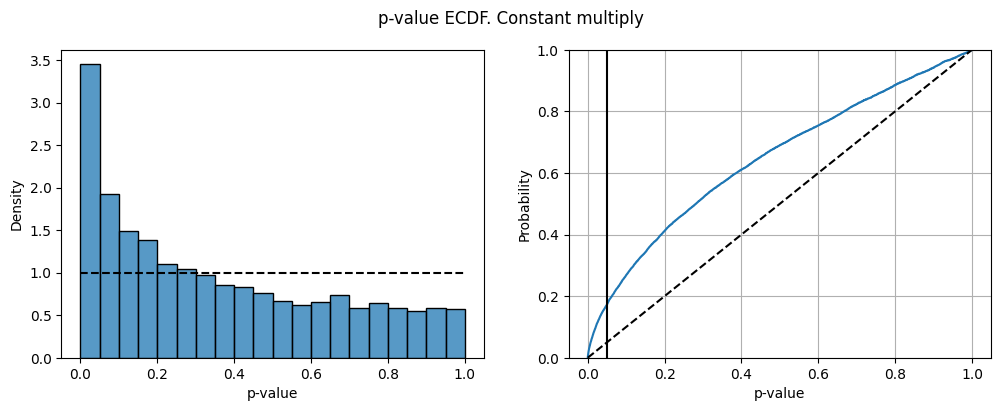

In [33]:
p_values = []
for _ in range(10000):
    sample_users = df.sample(sample_size*2)
    a = sample_users.user_id[:sample_size]
    b1 = sample_users.user_id[sample_size:int(sample_size + sample_size * 0.025)]
    b2 = sample_users.user_id[int(sample_size + sample_size * 0.025):]
    control = df[df['user_id'].isin(a)].price
    b1_users = df[df['user_id'].isin(b2)].price
    b2_users = df[df['user_id'].isin(b1)].price + mde * mean * sample_size / len(b1)
    test = pd.concat([b1_users, b2_users])
    
    p_val = stats.ttest_ind(control, test).pvalue
    p_values.append(p_val)

plot_pvalue_ecdf(p_values, alpha=alpha, title='p-value ECDF. Constant multiply')
errors = (np.array(p_values) > alpha).astype(int)
print(f'part errors = {np.mean(errors):0.4f}')

In [40]:
design

Design(statistical_test='ttest', effect=50.0, alpha=0.05, beta=0.1, sample_size=5)

In [55]:
_a = np.array([1., 2, 3, 4, 5])
_b = np.array([1., 2, 3, 4, 10])
group_generator = ([a, b] for a, b in ((_a, _b),))

TypeError: 'generator' object is not subscriptable

In [59]:
for i, j in ((_a, _b),):
    print(i)
    print(j)

[1. 2. 3. 4. 5.]
[ 1.  2.  3.  4. 10.]
